In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# **Import delle librerie**

In [2]:
from sklearn.datasets import load_iris

from sklearn import datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

# Recupero path di Colab

In [ ]:
path_principale = '/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/'

# **Salvataggio lista di librerie e versioni installate**

In [ ]:
!pip freeze > "/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/requirements_pnn.txt"

# Caricamento datasets BABELE


*   Training set
*   Validation set
*   Test set




## Caricamento Train - BABELE



### Train set BABELE con CODIFICA SPARSA

#### Train CODIFICA SPARSA - k compononenti

In [ ]:
def carica_train_codifica_sparsa(n_components, print_tables=False):

    # Definisci il percorso e il nome del file CSV di training
    data_folder = '/CSV_DATASET_CODIFICA_SPARSA/Train/'
    if n_components == 60000:
        csv_filename = 'Train_babele_lips_SVD.csv'
    elif n_components in [120, 80, 60, 40, 20, 8, 4]:
        csv_filename = f'Train_babele_lips_SVD_{n_components}C.csv'
    else:
        raise ValueError("Numero di componenti non valido! Hai inserito "+ n_components)
    full_path = path_principale + data_folder + csv_filename

    # Leggi il file CSV e assegna i dati al dataframe df_train
    df_train = pd.read_csv(full_path)

    # Rimuovi le colonne "target" e "video-frame" dal dataframe e assegna i dati rimanenti alla matrice delle features X
    X_train = df_train.drop(columns=['target', 'video-frame'])

    # Stampa la matrice delle features X
    if print_tables:
        print('-' * 50 + ' X_TRAIN ' + '-' * 50)
        display(X_train)

    # Seleziona la colonna "target" e assegna i dati all'array delle etichette Y
    Y_train = df_train[['target']]

    # Stampa l'array delle etichette Y
    if print_tables:
        print('-' * 50 + ' Y_TRAIN ' + '-' * 50)
        display(Y_train)

    return X_train, Y_train


In [ ]:
carica_train_svd(120)

#### Train - Features + CODIFICA SPARSA

In [ ]:
def carica_train_featuresPluscodifica_sparsa(print_tables=False):

    # Definisci i percorsi e i nomi dei file
    data_folder = '/CSV_DATASET_MERGED/Train/'
    csv_filename = 'Train_features+svd.csv'
    full_path = path_principale + data_folder + csv_filename

    # Leggi il file CSV e assegna i dati al dataframe df_train
    df_train = pd.read_csv(full_path)

    # Rimuovi le colonne "target" e "video-frame" dal dataframe e assegna i dati rimanenti alla matrice delle features X
    X_train = df_train.drop(columns=['target', 'video-frame'])

    # Stampa la matrice delle features X
    if print_tables:
        print('-' * 50 + ' X_TRAIN ' + '-' * 50)
        display(X_train)

    # Seleziona la colonna "target" e assegna i dati all'array delle etichette Y
    Y_train = df_train[['target']]

    # Stampa l'array delle etichette Y
    if print_tables:
        print('-' * 50 + ' Y_TRAIN ' + '-' * 50)
        display(Y_train)

    return X_train, Y_train


## Caricamento Validation - BABELE

In [ ]:
path_principale = '/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/'


## Validation set BABELE con CODIFICA SPARSA

### Validation CODIFICA SPARSA - k componenti

In [ ]:
def carica_validation_codifica_sparsa(n_components):

    # Definisci il percorso e il nome del file CSV di validation
    data_folder = '/CSV_DATASET_CODIFICA_SPARSA/Validation/'
    if n_components == 60000:
        csv_filename = 'Validation_babele_lips_SVD.csv'
    elif n_components in [120, 80, 60, 40, 20, 8, 4]:
        csv_filename = f'Validation_babele_lips_SVD_{n_components}C.csv'
    else:
        raise ValueError("Numero di componenti non valido")
    full_path = path_principale + data_folder + csv_filename

    # Leggi il file CSV e assegna i dati al dataframe df_validation
    df_validation = pd.read_csv(full_path)

    # Rimuovi le colonne "target" e "video-frame" dal dataframe e assegna i dati rimanenti alla matrice delle features X
    X_validation = df_validation.drop(columns=['target', 'video-frame'])

    # Stampa la matrice delle features X
    print('-' * 50 + ' X_VALIDATION ' + '-' * 50)
    display(X_validation)

    # Seleziona la colonna "target" e assegno i dati all'array delle etichette Y
    Y_validation = df_validation['target']

    # Stampa l'array delle etichette Y
    print('-' * 50 + ' Y_VALIDATION ' + '-' * 50)
    display(Y_validation)

    return X_validation, Y_validation

### Validation - Features + CODIFICA SPARSA

In [ ]:
def carica_validation_featuresPluscodifica_sparsa(print_tables=False):

    # Definisci i percorsi e i nomi dei file
    data_folder = '/CSV_DATASET_MERGED/Validation/'
    csv_filename = 'Validation_features+svd.csv'
    full_path = path_principale + data_folder + csv_filename

    # Leggi il file CSV e assegna i dati al dataframe df_validation
    df_validation = pd.read_csv(full_path)

    # Rimuovi le colonne "target" e "video-frame" dal dataframe e assegna i dati rimanenti alla matrice delle features X
    X_validation = df_validation.drop(columns=['target', 'video-frame'])

    # Stampa la matrice delle features X
    if print_tables:
        print('-' * 50 + ' X_VALIDATION ' + '-' * 50)
        display(X_validation)

    # Seleziona la colonna "target" e assegna i dati all'array delle etichette Y
    Y_validation = df_validation[['target']]

    # Stampa l'array delle etichette Y
    if print_tables:
        print('-' * 50 + ' Y_VALIDATION ' + '-' * 50)
        display(Y_validation)

    return X_validation, Y_validation


## Caricamento Test BABELE

In [ ]:
path_principale = '/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/'


### Test CODIFICA SPARSA - k componenti

In [ ]:
def carica_test_codifica_sparsa(n_components, print_tables=False):

    # Definisci il percorso e il nome del file CSV di test
    data_folder = '/CSV_DATASET_SVD/Test/'
    if n_components == 60000:
        csv_filename = 'Test_babele_lips_SVD.csv'
    elif n_components in [120, 80, 60, 40, 20, 8, 4]:
        csv_filename = f'Test_babele_lips_SVD_{n_components}C.csv'
    else:
        raise ValueError("Numero di componenti non valido")
    full_path = path_principale + data_folder + csv_filename

    # Leggi il file CSV e assegna i dati al dataframe df_test
    df_test = pd.read_csv(full_path)

    # Rimuovi le colonne "target" e "video-frame" dal dataframe e assegna i dati rimanenti alla matrice delle features X
    X_test = df_test.drop(columns=['target', 'video-frame'])

    # Stampa la matrice delle features X
    if print_tables:
        print('-' * 50 + ' X_TEST ' + '-' * 50)
        display(X_test)

    # Seleziona la colonna "target" e assegna i dati all'array delle etichette Y
    Y_test = df_test[['target']]

    # Stampa l'array delle etichette Y
    if print_tables:
        print('-' * 50 + ' Y_TEST ' + '-' * 50)
        display(Y_test)

    return X_test, Y_test


### Test -  Features + CODIFICA SPARSA

In [ ]:
def carica_test_featuresPluscodifica_sparsa(print_tables=False):

    # Definisci i percorsi e i nomi dei file
    data_folder = '/CSV_DATASET_MERGED/Test/'
    csv_filename = 'Test_features+svd.csv'
    full_path = path_principale + data_folder + csv_filename

    # Leggi il file CSV e assegna i dati al dataframe df_test
    df_test = pd.read_csv(full_path)

    # Rimuovi le colonne "target" e "video-frame" dal dataframe e assegna i dati rimanenti alla matrice delle features X
    X_test = df_test.drop(columns=['target', 'video-frame'])

    # Stampa la matrice delle features X
    if print_tables:
        print('-' * 50 + ' X_TEST ' + '-' * 50)
        display(X_test)

    # Seleziona la colonna "target" e assegna i dati all'array delle etichette Y
    Y_test = df_test[['target']]

    # Stampa l'array delle etichette Y
    if print_tables:
        print('-' * 50 + ' Y_TEST ' + '-' * 50)
        display(Y_test)

    return X_test, Y_test


## Caricamento dataset BABELE Train - Test CODIFICA SPARSA

In [ ]:

""" Carica il dataset di addestramento e di test ottenuto tramite Codifica sparsa con il numero di componenti specificato,
    e restituisce le feature e le etichette.

    Parametri:
    - n_components (int): Numero di componenti da utilizzare per la Codifica sparsa.
    - logging (bool, opzionale): Se True, stampa un messaggio di log. Default: False.

    Return:
    - X_train (array-like): Feature del dataset di addestramento ottenute tramite Codifica sparsa.
    - Y_train (array-like): Etichette del dataset di addestramento.
    - X_test (array-like): Feature del dataset di test ottenute tramite Codifica sparsa.
    - Y_test (array-like): Etichette del dataset di test.
    - log (str): Messaggio di log che indica il numero di componenti utilizzati per la Codifica sparsa. Restituito solo se `logging` è True.
    """
def carica_dataset_train_test_codifica_sparsa(n_components, logging=False):

    X_train, Y_train = carica_train_codifica_sparsa(n_components)
    X_test, Y_test = carica_test_codifica_sparsa(n_components)

    if logging:
        log = "Test_codifica_sparsa"+ str(n_components) + "C"
        print("Sto caricando il dataset: " + log)
        return X_train, Y_train, X_test, Y_test, log
    else:
        return X_train, Y_train, X_test, Y_test




## Caricamento dataset BABELE Train - Test FEATURES + Codifica sparsa

In [ ]:
""" Carica il dataset di addestramento e di test contenente le feature arricchite con SVD e restituisce le feature e le etichette.

    Parametri:
    - logging (bool, opzionale): Se True, stampa un messaggio di log. Default: False.

    Return:
    - X_train (array-like): Feature del dataset di addestramento.
    - Y_train (array-like): Etichette del dataset di addestramento.
    - X_test (array-like): Feature del dataset di test.
    - Y_test (array-like): Etichette del dataset di test.
    """
def carica_dataset_train_test_FeaturesPluscodifica_sparsa(logging=False):

    X_train, Y_train = carica_train_featuresPluscodifica_sparsa()
    X_test, Y_test = carica_test_featuresPluscodifica_sparsa()

    if logging:
        print("Sto caricando il dataset FeaturesPluscodifica_sparsa")

    return X_train, Y_train, X_test, Y_test


## Caricamento dataset BABELE Train - Validation Codifica sparsa

In [ ]:
 """Carica il dataset di addestramento e di validazione ottenuto tramite Codifica sparsa con il numero di componenti specificato,
    e restituisce le feature e le etichette.

    Parametri:
    - n_components (int): Numero di componenti da utilizzare per la Codifica sparsa.
    - logging (bool, opzionale): Se True, stampa un messaggio di log durante il caricamento del dataset. Default: False.

    Return:
    - X_train (array-like): Feature del dataset di addestramento ottenute tramite Codifica sparsa.
    - Y_train (array-like): Etichette del dataset di addestramento.
    - X_validation (array-like): Feature del dataset di validazione ottenute tramite Codifica sparsa.
    - Y_validation (array-like): Etichette del dataset di validazione.
    - log (str): Messaggio di log che indica il numero di componenti utilizzati per la Codifica sparsa. Restituito solo se `logging` è True.
    """
def carica_dataset_train_validation_codifica_sparsa(n_components, logging=False):

    X_train, Y_train = carica_train_codifica_sparsa(n_components)
    X_validation, Y_validation = carica_validation_codifica_sparsa(n_components)

    if logging:
        log = "Validation_codifica_sparsa" + str(n_components) + "C"
        print("Sto caricando il dataset: " + log)
        return X_train, Y_train, X_validation, Y_validation, log
    else:
        return X_train, Y_train, X_validation, Y_validation


## Caricamento dataset BABELE Train - Validation FEATURES + Codifica sparsa


In [ ]:
 """ Carica il dataset di addestramento e di validazione ottenuto tramite FeaturesPlusSVD,
    e restituisce le feature e le etichette.

    Parametri:
    - logging (bool, opzionale): Se True, stampa un messaggio di log durante il caricamento del dataset. Default: False.

    Return:
    - X_train (array-like): Feature del dataset di addestramento ottenute tramite FeaturesPlusSVD.
    - Y_train (array-like): Etichette del dataset di addestramento.
    - X_validation (array-like): Feature del dataset di validazione ottenute tramite FeaturesPlusSVD.
    - Y_validation (array-like): Etichette del dataset di validazione.
    """

def carica_dataset_train_validation_FeatturesPluscodifica_sparsa(logging=False):

    X_train, Y_train = carica_train_featuresPluscodifica_sparsa()
    X_validation, Y_validation = carica_validation_featuresPluscodifica_sparsa()

    if logging:
        print("Sto caricando il dataset FeaturesPluscodifica_sparsa")

    return X_train, Y_train, X_validation, Y_validation


#Implementazione di una Rete Neurale Probabilistica (PNN) per la classificazione con kernel e sigma variabili

## **Definizione funzioni kernel per indicare l'intervallo della probabilità**

Generazione grafici delle funzioni del kernerl

In [ ]:
def genera_grafico(function_name,function):
  # Generazione del range di valori di x
  x = np.linspace(-5, 5, 1000)

  # Calcolo dei valori della funzione uniform per ogni valore di x
  y = [function(i, 1) for i in x]

  # Creazione del grafico
  plt.plot(x, y)
  plt.title('Funzione '+ function_name)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

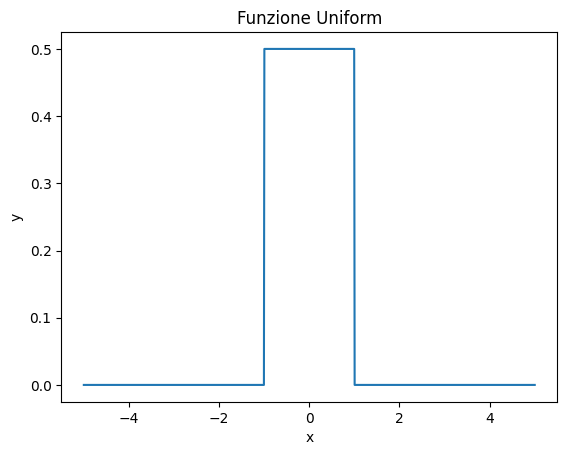

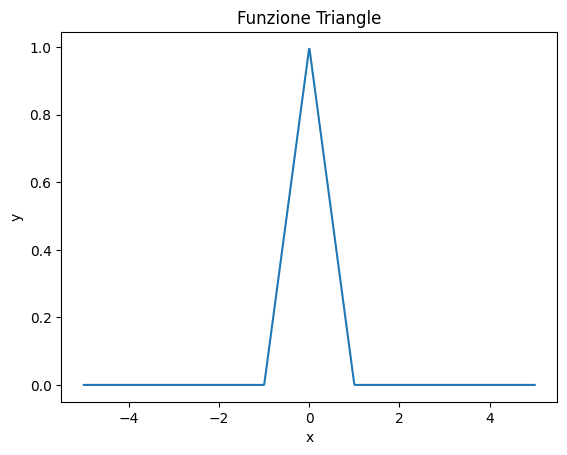

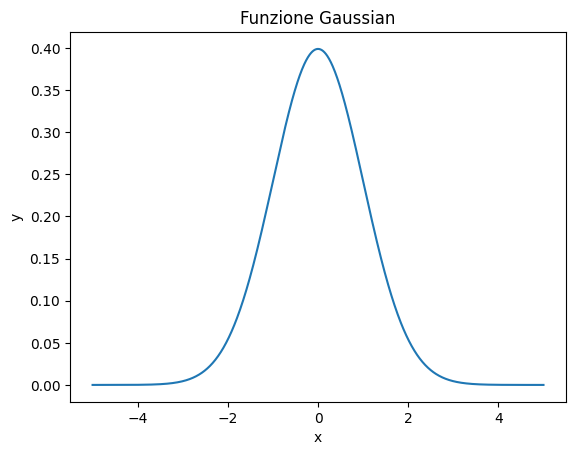

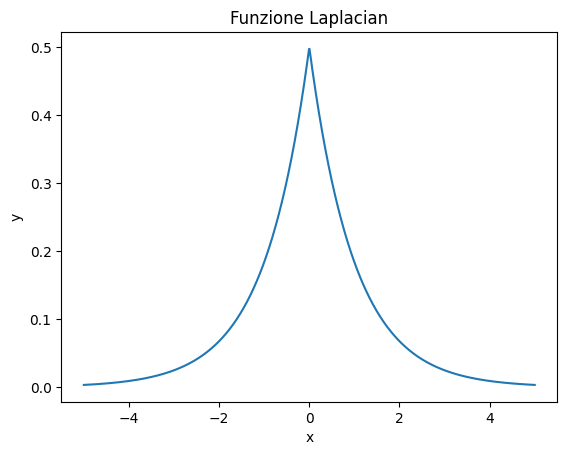

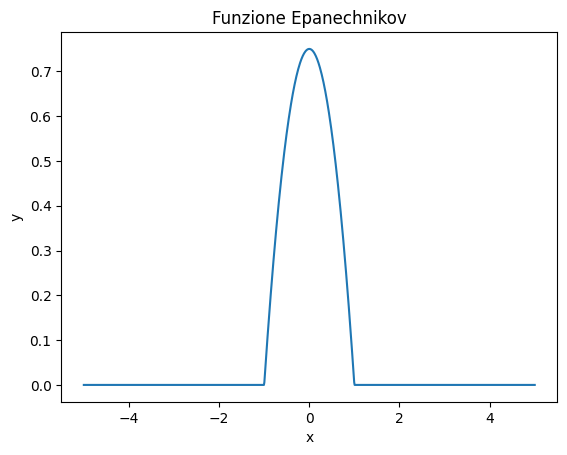

In [ ]:
# Definizione di diverse funzioni kernel utilizzate nell'algoritmo di smoothing

# Uniform kernel
# La funzione restituisce 1/2 se l'argomento è compreso tra -b e b, altrimenti restituisce 0
uniform = lambda x,b: (np.abs(x/b) <= 1) and 1/2 or 0
genera_grafico("Uniform",uniform)

# Triangular kernel
# La funzione restituisce 1 - l'argomento normalizzato per b se l'argomento è compreso tra -b e b, altrimenti restituisce 0
triangle = lambda x,b: (np.abs(x/b) <= 1) and  (1 - np.abs(x/b)) or 0
genera_grafico("Triangle",triangle)

# Gaussian kernel
# La funzione restituisce il valore della distribuzione gaussiana centrata in 0 e con deviazione standard b valutata in x
gaussian = lambda x,b: (1.0/np.sqrt(2*np.pi))* np.exp(-.5*(x/b)**2)
genera_grafico("Gaussian",gaussian)

# Laplacian kernel
# La funzione restituisce il valore della distribuzione di Laplace centrata in 0 e con parametro di scala b valutata in x
laplacian = lambda x,b: (1.0/(2*b))* np.exp(-np.abs(x/b))
genera_grafico("Laplacian",laplacian)

# Epanechnikov kernel
# La funzione restituisce (3/4)*(1 - l'argomento normalizzato per b elevato al quadrato) se l'argomento è compreso tra -b e b, altrimenti restituisce 0
epanechnikov = lambda x,b: (np.abs(x/b)<=1) and ((3/4)*(1-(x/b)**2)) or 0
genera_grafico("Epanechnikov",epanechnikov)

## **Creazione del livello Pattern**
Il layer pattern utilizza una funzione kernel per valutare la distanza tra il punto
di interesse e i punti dell'insieme di addestramento. I valori dei kernel sono utilizzati
per ponderare i punti dell'insieme di addestramento in base alla loro vicinanza al punto di interesse.

Tuttavia, i dati di addestramento possono contenere rumore o fluttuazioni casuali che possono
influire negativamente sull'accuratezza del modello. Per ridurre l'effetto del rumore nei dati
di addestramento, viene spesso utilizzata la tecnica di smoothing. In particolare, il parametro
di smoothing sigma viene utilizzato per regolare l'effetto della distanza sui punti vicini e lontani dal punto di interesse, riducendo l'impatto
del rumore e migliorando l'accuratezza del modello.

In [ ]:
def pattern_layer(inp, kernel, sigma):
  # Inizializzazione di una lista per i valori dei kernel
  k_values = []

  # Iterazione su tutti i punti dell'insieme di addestramento
  for i, p in enumerate(X_train.values):
    # Calcolo della distanza euclidea tra il punto di addestramento e il punto di interesse
    edis = np.linalg.norm(p - inp)

    # Valutazione del kernel per la distanza euclidea calcolata e il parametro di smoothing sigma
    k = kernel(edis, sigma)

    # Aggiunta del valore del kernel alla lista
    k_values.append(k)

  # Restituzione della lista dei valori dei kernel
  return k_values

## **Creazione del livello Summation**
La funzione "summation_layer" prende in input una lista di valori del kernel "k_values",
una serie di etichette di classe "Y_train" e un elenco delle diverse classi presenti nella
serie di etichette di classe "class_counts". La funzione calcola la somma pesata dei valori
di "k_values" per ogni classe nella serie di etichette di classe "Y_train" e restituisce una
lista di valori medi ponderati per classe. In particolare, la funzione seleziona gli indici
corrispondenti alla classe attuale e seleziona i valori di "k_values" corrispondenti alla classe attuale.
La somma viene quindi divisa per il numero di campioni nella classe corrente,
ottenuto utilizzando una funzione di Pandas, e il risultato viene normalizzato per ogni classe.
Infine, la funzione restituisce la lista di valori medi ponderati per classe come output.


In [ ]:
def summation_layer(k_values,Y_train,class_counts):
  # Determina il numero di classi diverse in Y_train
  num_classes = len(class_counts)
  # Inizializza un array di zeri con lunghezza uguale al numero di classi
  summed =[0] * num_classes

  # Calcola la somma pesata dei valori di k_values per ogni classe in Y_train
  for i,c in enumerate(class_counts):
    # Seleziona gli indici corrispondenti alla classe attuale
    val = (Y_train['target']==class_counts.index[i]).values;

    # Seleziona i valori di k_values corrispondenti alla classe attuale
    k_values = np.array(k_values);
    summed[i] = np.sum(k_values[val]);

  # Calcola la media ponderata dei valori per ogni classe
  avg_sum = list(summed/Y_train.value_counts());

  # Restituisce la lista di valori medi ponderati per classe
  return avg_sum

## **Creazione del livello di Output**
La funzione "output_layer" prende in input una lista di valori medi ponderati per classe "avg_sum"
e un elenco delle diverse classi presenti nella serie di etichette di classe "class_counts".
La funzione restituisce l'etichetta di classe corrispondente all'indice dell'elemento massimo nella lista
delle medie delle somme dei valori di "k_values" per ogni classe. In particolare, la funzione determina il
valore massimo nella lista delle medie delle somme dei valori di "k_values" per ogni classe, quindi determina
l'indice dell'elemento massimo nella lista e infine determina l'etichetta di classe corrispondente all'indice
dell'elemento massimo nella lista delle medie delle somme dei valori di "k_values" per ogni classe.
Infine, la funzione restituisce l'etichetta di classe come una stringa come output.



In [ ]:
def output_layer(avg_sum, class_counts):
  # Determina il valore massimo nella lista delle medie delle somme dei valori di k_values per ogni classe
  max_value = max(avg_sum)

  # Determina l'indice dell'elemento massimo nella lista delle medie delle somme dei valori di k_values per ogni classe
  max_index = avg_sum.index(max_value)

  # Determina l'etichetta di classe corrispondente all'indice dell'elemento massimo nella lista delle medie delle somme dei valori di k_values per ogni classe
  label = class_counts.index[max_index][0]

  # Restituisce l'etichetta di classe come una stringa
  return label

## **Unione dei tre livelli della Probabilistic Neural Network**
La funzione pnn implementa un classificatore denominato "Probabilistic Neural Network" (PNN) per la classificazione
di un set di dati X_test sulla base di un set di dati di training X_train con le relative etichette di classe Y_train.
Viene calcolata una stima della densità di probabilità per ogni classe presente in Y_train utilizzando
una funzione kernel (specificata come parametro) e una larghezza di banda sigma (anche questo come parametro).
Successivamente, per ogni osservazione in X_test, la funzione utilizza le stime di densità di probabilità
per calcolare la probabilità che l'osservazione appartenga a ciascuna classe presente in Y_train.
Infine, l'etichetta di classe con la probabilità più alta viene assegnata all'osservazione e viene aggiunta
alla lista di etichette di classe generate.
La funzione restituisce la lista di etichette di classe generate e stampa un messaggio di conferma.

In [ ]:
def pnn(X_train,Y_train,X_test,kernel,sigma):
  # Determina il conteggio di ogni classe nella serie di etichette di classe Y_train
  class_counts = Y_train.value_counts()

  # Inizializza una lista vuota per le etichette di classe generate
  labels=[]

  # Iterazione su ogni osservazione del set di test
  for s in X_test.values:
    # Calcola i valori del kernel per l'osservazione attuale
    k_values = pattern_layer(s,kernel,sigma);

    # Calcola la somma pesata dei valori del kernel per ogni classe presente nella serie di etichette di classe Y_train
    avg_sum = summation_layer(k_values,Y_train,class_counts);

    # Determina l'etichetta di classe corrispondente all'osservazione attuale
    label = output_layer(avg_sum,class_counts);

    # Aggiunge l'etichetta di classe alla lista delle etichette di classe generate
    labels.append(label);

  # Restituisce la lista delle etichette di classe generate
  return labels;

# Applicazione Particle Swarm Optimization per ricerca parametri ottimi
In questa sezione si utilizza l'algoritmo PSO(Particle Swarm Optimization) per l'ottimizzazione dei parametri di una PNN, in modo da trovare i valori ottimali di sigma e del kernel che massimizzino la sua capacità di generalizzazione sui dati di test. L'algoritmo PSO utilizza una funzione obiettivo per valutare la qualità delle soluzioni candidate e cerca di trovare i valori ottimali dei parametri muovendo le particelle verso le soluzioni migliori. Alla fine dell'ottimizzazione, il notebook restituisce i valori di sigma e del kernel ottimali, insieme alla metrica di performance, che possono essere utilizzati per addestrare e testare la PNN con i dati di addestramento e di test.





*   options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}: questi sono i parametri dell'algoritmo PSO. In particolare, 'c1' e 'c2' rappresentano i coefficienti di accelerazione cognitiva e sociale, rispettivamente, mentre 'w' rappresenta il peso dell'inerzia. Questi parametri controllano la velocità con cui le particelle si muovono verso la migliore soluzione individuale e globale, nonché l'effetto dell'inerzia sulla loro velocità.
*   bounds = ([0.1], [1.8]): questi sono i limiti inferiori e superiori per il valore di sigma, il parametro che stiamo cercando di ottimizzare. In particolare, abbiamo impostato il limite inferiore a 0.1 e il limite superiore a 1.8, poiché sappiamo che il valore ottimale di sigma si trova in questo intervallo.

*   n_particles = 30: questo parametro indica il numero di particelle utilizzate nell'algoritmo PSO. Un numero più elevato di particelle può aumentare la precisione dell'ottimizzazione, ma richiede anchepiù tempo di esecuzione.

*   n_iterations = 100: questo parametro indica il numero di iterazioni dell'algoritmo PSO. Più iterazioni possono migliorare la precisione dell'ottimizzazione, ma richiedono anche più tempo di esecuzione. Abbiamo scelto 100 iterazioni poiché abbiamo verificato che questo valore è sufficiente per raggiungere la convergenza dell'algoritmo.

In [ ]:
!pip install pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.0 MB/s eta 0:00:00


## BABELE

### Applicazione su Test BABELE Codifica sparsa

In [ ]:
import pyswarms as ps
import pandas as pd

# Definisci la funzione obiettivo per l'ottimizzazione
def pnn_accuracy_score(x):
    kernel = gaussian  # Utilizza il kernel gaussiano
    preds = pnn(X_train, Y_train, X_test, kernel, x[0])  # Utilizza x[0] come valore di sigma
    return -accuracy_score(Y_test, preds)  # Negare il punteggio di accuratezza per la massimizzazione

componenti = [120, 80, 60, 40, 20, 8, 4, 60000]

for c in componenti:
  X_train, Y_train, X_test, Y_test = carica_dataset_train_test_codifica_sparsa(c)

  # Imposta i parametri per l'algoritmo PSO
  options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
  bounds = ([0.1], [1.8])  # Imposta i limiti inferiori e superiori per sigma
  n_particles = 45
  n_iterations = 100

  # Esegui l'ottimizzazione
  optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, dimensions=1, options=options, bounds=bounds)
  best_cost, best_pos = optimizer.optimize(pnn_accuracy_score, n_iterations)

  # Ottieni la massima accuratezza e sigma ottimizzato
  accuracy_max = -best_cost
  sigma_opt = best_pos[0]  # Estrai sigma ottimizzato dall'array della migliore posizione

  # Stampa la massima accuratezza e sigma ottimizzato
  print("Massima Accuratezza:", accuracy_max)
  print("Sigma Ottimizzato:", sigma_opt)

  # Crea un DataFrame con i valori ottimi di sigma
  df_sigma = pd.DataFrame({'Sigma Ottimo': [sigma_opt]})

  # verifica se la cartella di destinazione esiste, altrimenti la crea
  if not os.path.exists(path_principale + '/Codici PNN/Sigma ottimi/CODIFICA_SPARSA/'):
      os.makedirs(path_principale + '/Codici PNN/Sigma ottimi/CODIFICA_SPARSA/')


  # Salva il DataFrame in un file CSV
  df_sigma.to_csv(path_principale + '/Codici PNN/Sigma ottimi/CODIFICA_SPARSA/' + 'sigma_ottimo_codifica_sparsa_'+str(c)+'_componenti.csv', index=False)

2023-06-01 19:48:33,103 - pyswarms.single.global_best - INFO - Optimize for 1 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1/1, best_cost=-.163
2023-06-01 19:53:37,738 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.1625, best pos: [1.43376206]


Massima Accuratezza: 0.1625
Sigma Ottimizzato: 1.433762055701827


### **Applicazione su Test BABELE feature + Codifica sparsa**

In [ ]:
import pyswarms as ps
import pandas as pd

X_train, Y_train, X_test, Y_test= carica_dataset_train_test_FeaturesPluscodifica_sparsa()

# Definisci la funzione obiettivo per l'ottimizzazione
def pnn_accuracy_score(x):
    kernel = gaussian  # Utilizza il kernel gaussiano
    preds = pnn(X_train, Y_train, X_test, kernel, x[0])  # Utilizza x[0] come valore di sigma
    return -accuracy_score(Y_test, preds)  # Negare il punteggio di accuratezza per la massimizzazione

# Imposta i parametri per l'algoritmo PSO
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
bounds = ([0.1], [1.8])  # Imposta i limiti inferiori e superiori per sigma
n_particles = 45
n_iterations = 100

# Esegui l'ottimizzazione
optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, dimensions=1, options=options, bounds=bounds)
best_cost, best_pos = optimizer.optimize(pnn_accuracy_score, n_iterations)

# Ottieni la massima accuratezza e sigma ottimizzato
accuracy_max = -best_cost
sigma_opt = best_pos[0]  # Estrai sigma ottimizzato dall'array della migliore posizione

# Stampa la massima accuratezza e sigma ottimizzato
print("Massima Accuratezza:", accuracy_max)
print("Sigma Ottimizzato:", sigma_opt)

# Crea un DataFrame con i valori ottimi di sigma
df_sigma = pd.DataFrame({'Sigma Ottimo': [sigma_opt]})

# verifica se la cartella di destinazione esiste, altrimenti la crea
if not os.path.exists(path_principale + '/Codici PNN/Sigma ottimi/CODIFICA_SPARSA/'):
    os.makedirs(path_principale + '/Codici PNN/Sigma ottimi/CODIFICA_SPARSA/')


# Salva il DataFrame in un file CSV
df_sigma.to_csv(path_principale + '/Codici PNN/Sigma ottimi/CODIFICA_SPARSA/' + 'sigma_ottimo_codifica_sparsa_più_feature.csv', index=False)

2023-06-01 19:59:51,091 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-.319
2023-06-01 20:06:08,475 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.31875, best pos: [0.47230714]


Massima Accuratezza: 0.31875
Sigma Ottimizzato: 0.47230714020572206


### Applicazione su Validation BABELE Codifica sparsa

In [ ]:
import pyswarms as ps
import pandas as pd

# Definisci la funzione obiettivo per l'ottimizzazione
def pnn_accuracy_score(x):
    kernel = gaussian  # Utilizza il kernel gaussiano
    preds = pnn(X_train, Y_validation, X_validation, kernel, x[0])  # Utilizza x[0] come valore di sigma
    return -accuracy_score(Y_validation, preds)  # Negare il punteggio di accuratezza per la massimizzazione

componenti = [120, 80, 60, 40, 20, 8, 4, 60000]

for c in componenti:
  X_train, Y_train, X_validation, Y_validation = carica_dataset_train_validation_codifica_sparsa(c)

  # Imposta i parametri per l'algoritmo PSO
  options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
  bounds = ([0.1], [1.8])  # Imposta i limiti inferiori e superiori per sigma
  n_particles = 45
  n_iterations = 100

  # Esegui l'ottimizzazione
  optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, dimensions=1, options=options, bounds=bounds)
  best_cost, best_pos = optimizer.optimize(pnn_accuracy_score, n_iterations)

  # Ottieni la massima accuratezza e sigma ottimizzato
  accuracy_max = -best_cost
  sigma_opt = best_pos[0]  # Estrai sigma ottimizzato dall'array della migliore posizione

  # Stampa la massima accuratezza e sigma ottimizzato
  print("Massima Accuratezza:", accuracy_max)
  print("Sigma Ottimizzato:", sigma_opt)

  # Crea un DataFrame con i valori ottimi di sigma
  df_sigma = pd.DataFrame({'Sigma Ottimo': [sigma_opt]})

  # verifica se la cartella di destinazione esiste, altrimenti la crea
  if not os.path.exists(path_principale + '/Codici PNN/Sigma ottimi/CODIFICA_SPARSA/'):
      os.makedirs(path_principale + '/Codici PNN/Sigma ottimi/CODIFICA_SPARSA/')


  # Salva il DataFrame in un file CSV
  df_sigma.to_csv(path_principale + '/Codici PNN/Sigma ottimi/CODIFICA_SPARSA/' + 'sigma_ottimo_codifica_sparsa_'+str(c)+'_componenti_val.csv', index=False)

2023-06-01 19:48:33,103 - pyswarms.single.global_best - INFO - Optimize for 1 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1/1, best_cost=-.163
2023-06-01 19:53:37,738 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.1625, best pos: [1.43376206]


Massima Accuratezza: 0.1625
Sigma Ottimizzato: 1.433762055701827


### **Applicazione su Validation BABELE feature + Codifica sparsa**

In [ ]:
import pyswarms as ps
import pandas as pd

X_train, Y_train, X_validation, Y_validation = carica_dataset_train_validation_FeatturesPluscodifica_sparsa()

# Definisci la funzione obiettivo per l'ottimizzazione
def pnn_accuracy_score(x):
    kernel = gaussian  # Utilizza il kernel gaussiano
    preds = pnn(X_train, Y_train, X_validation, kernel, x[0])  # Utilizza x[0] come valore di sigma
    return -accuracy_score(Y_validation, preds)  # Negare il punteggio di accuratezza per la massimizzazione

# Imposta i parametri per l'algoritmo PSO
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
bounds = ([0.1], [1.8])  # Imposta i limiti inferiori e superiori per sigma
n_particles = 45
n_iterations = 100

# Esegui l'ottimizzazione
optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, dimensions=1, options=options, bounds=bounds)
best_cost, best_pos = optimizer.optimize(pnn_accuracy_score, n_iterations)

# Ottieni la massima accuratezza e sigma ottimizzato
accuracy_max = -best_cost
sigma_opt = best_pos[0]  # Estrai sigma ottimizzato dall'array della migliore posizione

# Stampa la massima accuratezza e sigma ottimizzato
print("Massima Accuratezza:", accuracy_max)
print("Sigma Ottimizzato:", sigma_opt)

# Crea un DataFrame con i valori ottimi di sigma
df_sigma = pd.DataFrame({'Sigma Ottimo': [sigma_opt]})

# verifica se la cartella di destinazione esiste, altrimenti la crea
if not os.path.exists(path_principale + '/Codici PNN/Sigma ottimi/CODIFICA_SPARSA/'):
    os.makedirs(path_principale + '/Codici PNN/Sigma ottimi/CODIFICA_SPARSA/')


# Salva il DataFrame in un file CSV
df_sigma.to_csv(path_principale + '/Codici PNN/Sigma ottimi/CODIFICA_SPARSA/' + 'sigma_ottimo_codifica_sparsa_più_feature_val.csv', index=False)

# Applicazione della PNN
sigma rappresenta il parametro di smoothing utilizzato nell'algoritmo di Parzen-Window.
L'algoritmo di Parzen-Window è un metodo non parametrico per la stima della densità di probabilità
di una variabile casuale. In questo algoritmo, si utilizza una finestra di dimensione sigma per calcolare
la densità di probabilità stimata.
Il parametro sigma controlla la larghezza della finestra, ovvero la distanza entro cui viene calcolata
la densità di probabilità stimata. Un valore di sigma maggiore indica che la finestra è più ampia e quindi
si considerano più dati per la stima della densità di probabilità,
mentre un valore di sigma minore indica che la finestra è più stretta e quindi si considerano meno dati per
la stima della densità di probabilità.

## BABELE - Codifica sparsa

In [ ]:
def create_confusion_matrix(Y_test, pred, labels, sigma, kernel, save_path=None, filename=None):
  cm = confusion_matrix(Y_test.values, pred)

  # Plot della matrice di confusione
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap='Reds', xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.title('Matrice di confusione (sigma='+str(sigma)+' , kernel='+kernel+')')

# Salvataggio dell'immagine della matrice di confusione
  if save_path is not None:
      if filename is not None:
       plt.savefig(save_path + filename+'.png', bbox_inches='tight')

      else:
        plt.savefig(save_path + "ConfusionMatrix.png", bbox_inches='tight')
      plt.show()
  else:
      plt.show()

  plt.close()


In [ ]:
def valutazione_performance(Y_test, pred):
  accuracy = accuracy_score(Y_test, pred)
  accuracy_100 = "{:.2%}".format(accuracy)
  f1 = "{:.2%}".format(f1_score(Y_test, pred, average='weighted'))
  precision = "{:.2%}".format(precision_score(Y_test, pred, average='micro'))
  recall = "{:.2%}".format(recall_score(Y_test, pred, average='micro'))

  return accuracy, accuracy_100, f1, precision, recall

### Applicazione su Test set BABELE Codifica sparsa

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


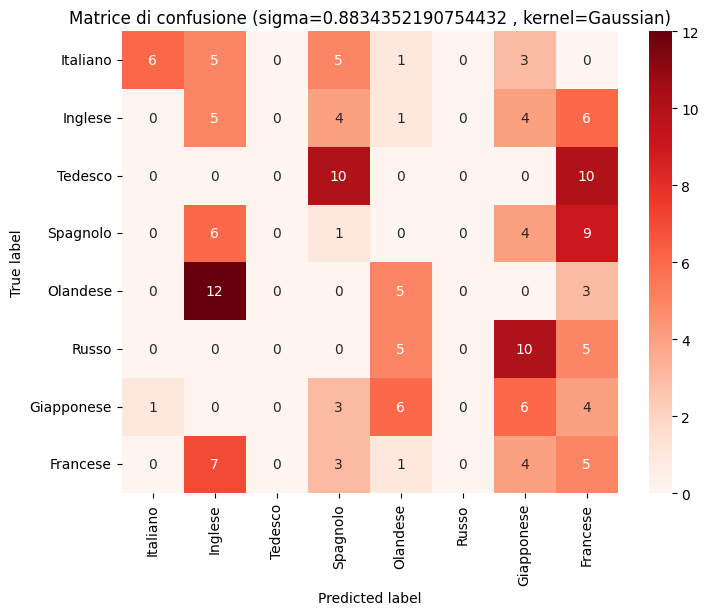

     Kernel  Smoothing Param Accuracy (%) F1-Score Precision  Recall
0  Gaussian         0.883435       17.50%   16.53%    17.50%  17.50%
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


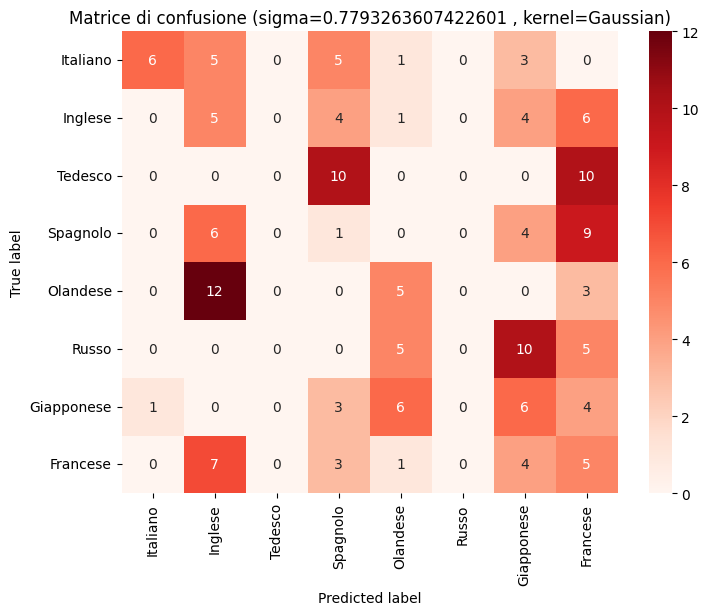

     Kernel  Smoothing Param Accuracy (%) F1-Score Precision  Recall
0  Gaussian         0.779326       17.50%   16.53%    17.50%  17.50%
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


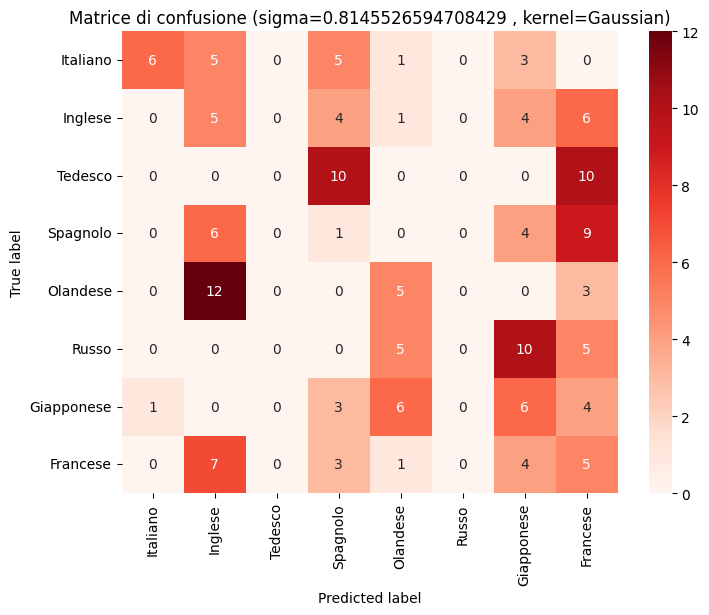

     Kernel  Smoothing Param Accuracy (%) F1-Score Precision  Recall
0  Gaussian         0.814553       17.50%   16.53%    17.50%  17.50%
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


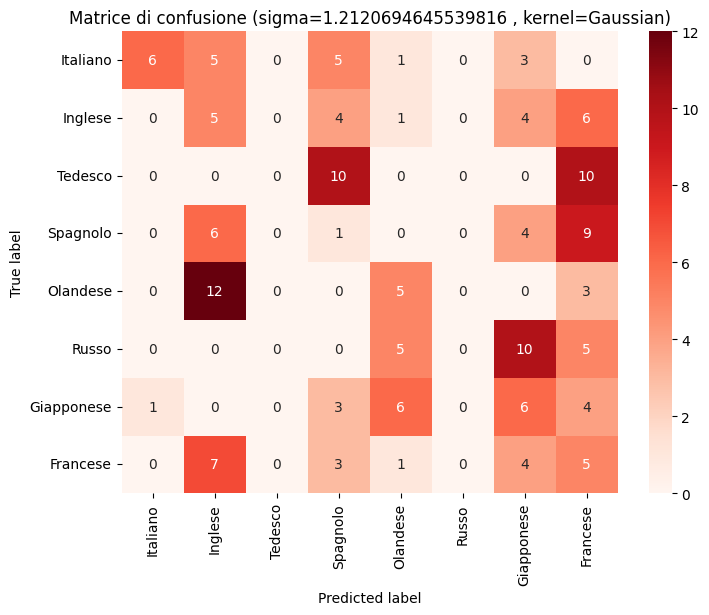

     Kernel  Smoothing Param Accuracy (%) F1-Score Precision  Recall
0  Gaussian         1.212069       17.50%   16.53%    17.50%  17.50%
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


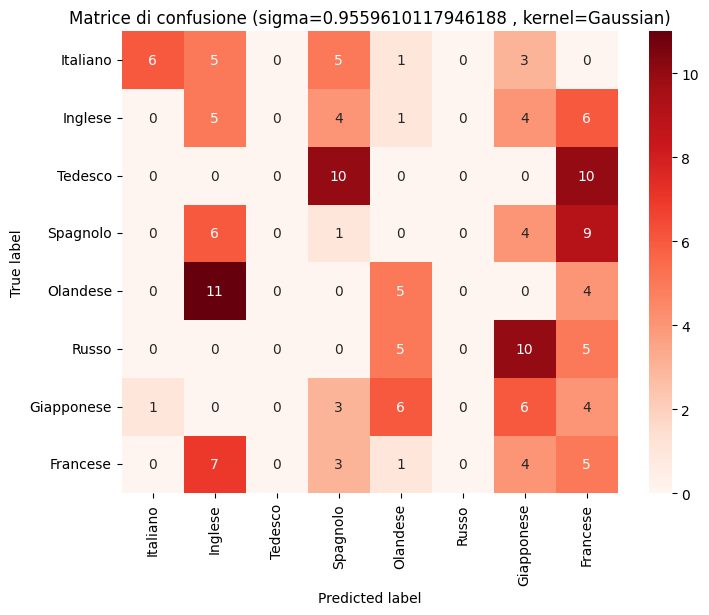

     Kernel  Smoothing Param Accuracy (%) F1-Score Precision  Recall
0  Gaussian         0.955961       17.50%   16.54%    17.50%  17.50%
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


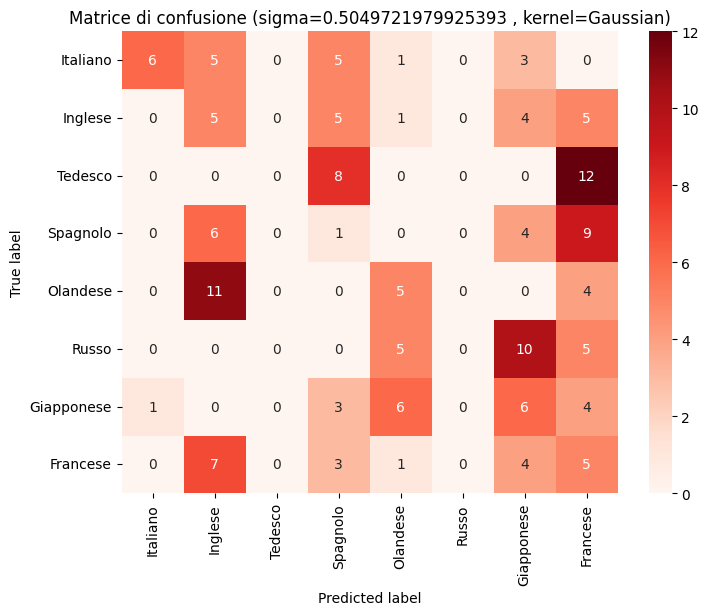

     Kernel  Smoothing Param Accuracy (%) F1-Score Precision  Recall
0  Gaussian         0.504972       17.50%   16.53%    17.50%  17.50%
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


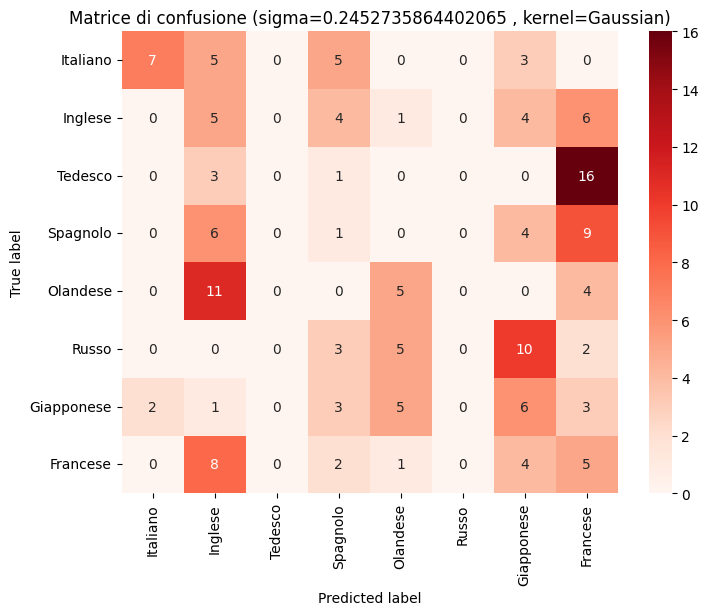

     Kernel  Smoothing Param Accuracy (%) F1-Score Precision  Recall
0  Gaussian         0.245274       18.12%   17.04%    18.12%  18.12%
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


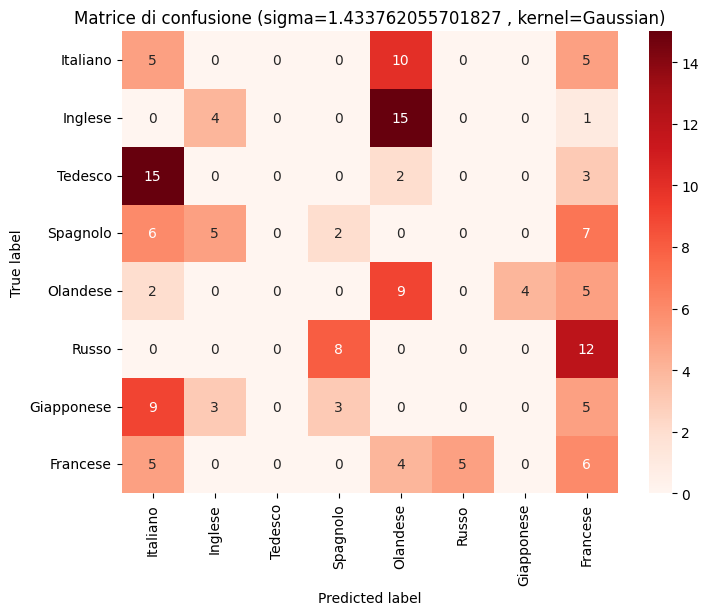

     Kernel  Smoothing Param Accuracy (%) F1-Score Precision  Recall
0  Gaussian         1.433762       16.25%   12.75%    16.25%  16.25%
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Definizione della cartella di destinazione per le immagini delle matrici di confusione
output_folder = path_principale + '/Codici PNN/Matrici Confusione/CODIFICA_SPARSA/'
os.makedirs(output_folder, exist_ok=True)

# Definizione della lista di possibili funzioni kernel
k_func = gaussian

componenti = [120, 80, 60, 40, 20, 8, 4, 60000]

for c in componenti:
  # Carica il DataFrame del sigma ottimo, utilizzando il kernel gaussiano
  df_sigmaOttimo = pd.read_csv(path_principale + '/Codici PNN/Sigma ottimi/CODIFICA_SPARSA/' + 'sigma_ottimo_codifica_sparsa_'+str(c)+'_componenti.csv')
  sigmaOttimo = df_sigmaOttimo['Sigma Ottimo'][0]

  X_train, Y_train, X_test, Y_test = carica_dataset_train_test_codifica_sparsa(c)

  # Inizializzazione di un DataFrame vuoto per salvare le statistiche di performance del classificatore
  results = pd.DataFrame(columns=['Kernel', 'Smoothing Param', 'Accuracy', 'Accuracy (%)', 'F1-Score', 'Precision', 'Recall'])


  print("---" * 100)

  # Generazione delle etichette di classe per il set di test utilizzando la funzione kernel corrente e il valore di sigma corrente
  pred = pnn(X_train, Y_train, X_test, k_func, sigmaOttimo)


  labels = ['Italiano', 'Inglese', 'Tedesco', 'Spagnolo', 'Olandese', 'Russo', 'Giapponese', 'Francese']

  # Calcolo delle metriche di performance in %
  accuracy, accuracy_100, f1, precision, recall = valutazione_performance(Y_test.values, pred)

  #stampa matrice di confusione
  nome_file = 'CM_test_codifica_sparsa_'+str(c)+'_componenti_A'+format(accuracy, '.2f')
  create_confusion_matrix(Y_test, pred, labels, sigmaOttimo, "Gaussian", output_folder , nome_file )


  # Aggiunta delle statistiche di performance per la combinazione corrente di kernel e sigma al DataFrame results
  results.loc[len(results)] = ["Gaussian", sigmaOttimo, accuracy, accuracy_100, f1, precision, recall]

  # Stampa del DataFrame results. Per un questione di stile elimino la colonna accuracy, è presente l'accuracy in percentuale
  print(results.drop(columns=['Accuracy']))
  print("---" * 100)

### Applicazione su Test set BABELE feature + Codifica sparsa



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


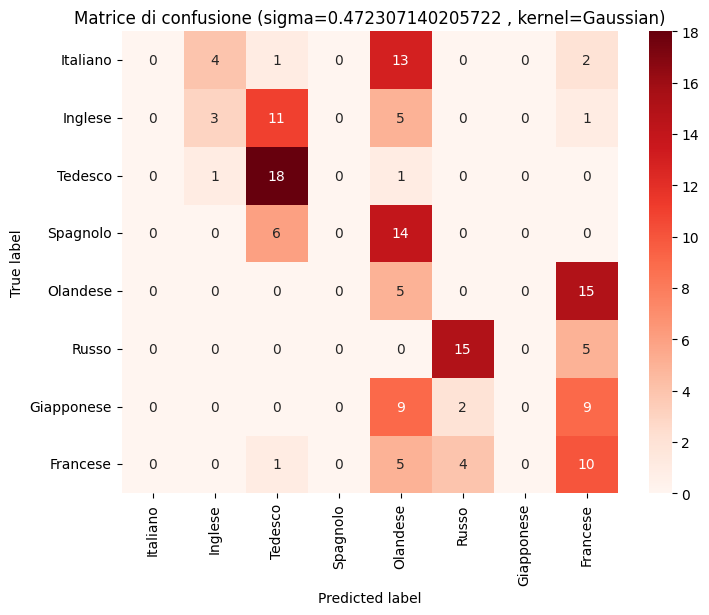

     Kernel  Smoothing Param Accuracy (%) F1-Score Precision  Recall
0  Gaussian         0.472307       31.87%   25.49%    31.87%  31.87%
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Definizione della cartella di destinazione per le immagini delle matrici di confusione
output_folder = path_principale + '/Codici PNN/Matrici Confusione/CODIFICA_SPARSA/'
os.makedirs(output_folder, exist_ok=True)

# Definizione della lista di possibili funzioni kernel
k_func = gaussian


# Carica il DataFrame del sigma ottimo, utilizzando il kernel gaussiano
df_sigmaOttimo = pd.read_csv(path_principale + '/Codici PNN/Sigma ottimi/CODIFICA_SPARSA/' + 'sigma_ottimo_codifica_sparsa_più_feature.csv')
sigmaOttimo = df_sigmaOttimo['Sigma Ottimo'][0]

X_train, Y_train, X_test, Y_test = carica_dataset_train_test_FeaturesPluscodifica_sparsa()

# Inizializzazione di un DataFrame vuoto per salvare le statistiche di performance del classificatore
results = pd.DataFrame(columns=['Kernel', 'Smoothing Param', 'Accuracy', 'Accuracy (%)', 'F1-Score', 'Precision', 'Recall'])


print("---" * 100)

# Generazione delle etichette di classe per il set di test utilizzando la funzione kernel corrente e il valore di sigma corrente
pred = pnn(X_train, Y_train, X_test, k_func, sigmaOttimo)


labels = ['Italiano', 'Inglese', 'Tedesco', 'Spagnolo', 'Olandese', 'Russo', 'Giapponese', 'Francese']

# Calcolo delle metriche di performance in %
accuracy, accuracy_100, f1, precision, recall = valutazione_performance(Y_test.values, pred)

#stampa matrice di confusione
nome_file = 'CM_test_codifica_sparsa_più_feature_A'+format(accuracy, '.2f')
create_confusion_matrix(Y_test, pred, labels, sigmaOttimo, "Gaussian", output_folder , nome_file )


# Aggiunta delle statistiche di performance per la combinazione corrente di kernel e sigma al DataFrame results
results.loc[len(results)] = ["Gaussian", sigmaOttimo, accuracy, accuracy_100, f1, precision, recall]

# Stampa del DataFrame results. Per un questione di stile elimino la colonna accuracy, è presente l'accuracy in percentuale
print(results.drop(columns=['Accuracy']))
print("---" * 100)

In [ ]:
display(results)

#### Visualizzazione e salvataggio risultati su test set in csv

In [ ]:
display(results)
csv_path = "/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_PNN_RESULT_MERGED/results_testset_babele_CSV_10random.csv"
results.to_csv(csv_path, index=False) #Creazione csv da dataframe su dati di test



#### Visualizzazione e salvataggio risultati su test set in csv VSR

In [ ]:
display(results)
csv_path = "/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/results_testset_SVD.csv"
results.to_csv(csv_path, index=False) #Creazione csv da dataframe su dati di test

#### Grafici accuratezza e F1-score su test set
L'accuratezza è sicuramente una prima metrica da prendere in considerazione. Un'accuratezza troppo bassa, per il caso d'uso in esame, rende il modello poco o per nulla adatto. Un'accuratezza pari a 0.98 vuol dire che, su 100 campioni, il nostro modello fornisce previsioni sbagliate soltanto su 2 campioni, è una misura dell'accuratezza di un test. La misura tiene in considerazione precisione e recupero del test, dove la precisione è il numero di veri positivi diviso il numero di tutti i risultati positivi, mentre il recupero è il numero di veri positivi diviso il numero di tutti i test che sarebbero dovuti risultare positivi (ovvero veri positivi più falsi negativi)

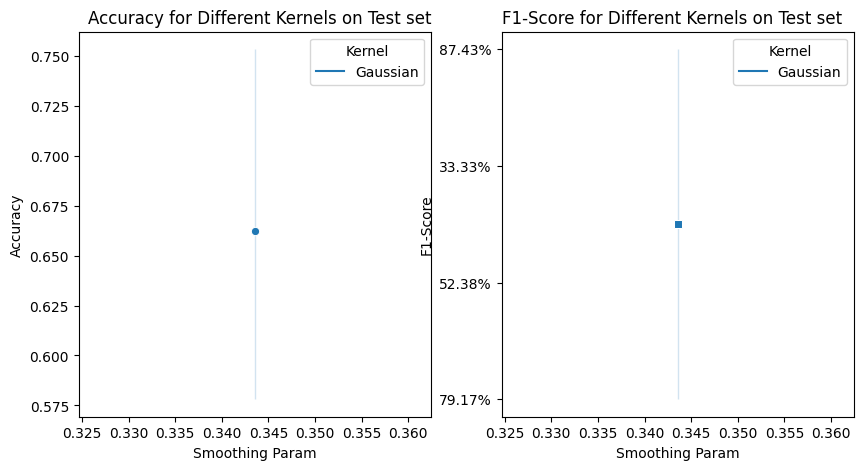

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(121)
sns.lineplot(y=results['Accuracy'],x=results['Smoothing Param'],hue=results['Kernel'], marker='o');
plt.title('Accuracy for Different Kernels on Test set',loc='right');

plt.subplot(122)
sns.lineplot(y=results['F1-Score'],x=results['Smoothing Param'],hue=results['Kernel'], marker='s');
plt.title('F1-Score for Different Kernels on Test set',loc='left');

plt.show()

### Applicazione su Validation set BABELE Codifica sparsa

In [ ]:
# Definizione della cartella di destinazione per le immagini delle matrici di confusione
output_folder = path_principale + '/Codici PNN/Matrici Confusione/CODIFICA_SPARSA/'
os.makedirs(output_folder, exist_ok=True)

# Definizione della lista di possibili funzioni kernel
k_func = gaussian

componenti = [120, 80, 60, 40, 20, 8, 4, 60000]

for c in componenti:
  # Carica il DataFrame del sigma ottimo, utilizzando il kernel gaussiano
  df_sigmaOttimo = pd.read_csv(path_principale + '/Codici PNN/Sigma ottimi/CODIFICA_SPARSA/' + 'sigma_ottimo_codifica_sparsa_'+str(c)+'_componenti_vval.csv')
  sigmaOttimo = df_sigmaOttimo['Sigma Ottimo'][0]

  X_train, Y_train, X_validation, Y_validation = carica_dataset_train_validation_codifica_sparsa(c)

  # Inizializzazione di un DataFrame vuoto per salvare le statistiche di performance del classificatore
  results = pd.DataFrame(columns=['Kernel', 'Smoothing Param', 'Accuracy', 'Accuracy (%)', 'F1-Score', 'Precision', 'Recall'])


  print("---" * 100)

  # Generazione delle etichette di classe per il set di test utilizzando la funzione kernel corrente e il valore di sigma corrente
  pred = pnn(X_train, Y_train, X_validation, k_func, sigmaOttimo)


  labels = ['Italiano', 'Inglese', 'Tedesco', 'Spagnolo', 'Olandese', 'Russo', 'Giapponese', 'Francese']

  # Calcolo delle metriche di performance in %
  accuracy, accuracy_100, f1, precision, recall = valutazione_performance(Y_validation.values, pred)

  #stampa matrice di confusione
  nome_file = 'CM_validation_codifica_sparsa_'+str(c)+'_componenti_A'+format(accuracy, '.2f')
  create_confusion_matrix(Y_validation, pred, labels, sigmaOttimo, "Gaussian", output_folder , nome_file )


  # Aggiunta delle statistiche di performance per la combinazione corrente di kernel e sigma al DataFrame results
  results.loc[len(results)] = ["Gaussian", sigmaOttimo, accuracy, accuracy_100, f1, precision, recall]

  # Stampa del DataFrame results. Per un questione di stile elimino la colonna accuracy, è presente l'accuracy in percentuale
  print(results.drop(columns=['Accuracy']))
  print("---" * 100)

### Applicazione su Validation set BABELE feature + Codifica sparsa

In [ ]:
# Definizione della cartella di destinazione per le immagini delle matrici di confusione
output_folder = path_principale + '/Codici PNN/Matrici Confusione/CODIFICA_SPARSA/'
os.makedirs(output_folder, exist_ok=True)

# Definizione della lista di possibili funzioni kernel
k_func = gaussian


# Carica il DataFrame del sigma ottimo, utilizzando il kernel gaussiano
df_sigmaOttimo = pd.read_csv(path_principale + '/Codici PNN/Sigma ottimi/CODIFICA_SPARSA/' + 'sigma_ottimo_codifica_sparsa_più_feature_val.csv')
sigmaOttimo = df_sigmaOttimo['Sigma Ottimo'][0]

X_train, Y_train, X_validation, Y_validation = carica_dataset_train_validation_FeatturesPluscodifica_sparsa()

# Inizializzazione di un DataFrame vuoto per salvare le statistiche di performance del classificatore
results = pd.DataFrame(columns=['Kernel', 'Smoothing Param', 'Accuracy', 'Accuracy (%)', 'F1-Score', 'Precision', 'Recall'])


print("---" * 100)

# Generazione delle etichette di classe per il set di test utilizzando la funzione kernel corrente e il valore di sigma corrente
pred = pnn(X_train, Y_train, X_validation, k_func, sigmaOttimo)


labels = ['Italiano', 'Inglese', 'Tedesco', 'Spagnolo', 'Olandese', 'Russo', 'Giapponese', 'Francese']

# Calcolo delle metriche di performance in %
accuracy, accuracy_100, f1, precision, recall = valutazione_performance(Y_validation.values, pred)

#stampa matrice di confusione
nome_file = 'CM_validation_codifica_sparsa_più_feature_A'+format(accuracy, '.2f')
create_confusion_matrix(Y_validation, pred, labels, sigmaOttimo, "Gaussian", output_folder , nome_file )


# Aggiunta delle statistiche di performance per la combinazione corrente di kernel e sigma al DataFrame results
results.loc[len(results)] = ["Gaussian", sigmaOttimo, accuracy, accuracy_100, f1, precision, recall]

# Stampa del DataFrame results. Per un questione di stile elimino la colonna accuracy, è presente l'accuracy in percentuale
print(results.drop(columns=['Accuracy']))
print("---" * 100)

#### Visualizzazione e salvataggio risultati su validation set in csv

In [ ]:
display(results)
csv_path = "/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/results_validationset_babele.csv"
results.to_csv(csv_path, index=False) #Creazione csv da dataframe su dati di validation

,Kernel,Smoothing Param,Accuracy,F1-Score
0,Uniform,0.05,0.131410,0.050954
1,Uniform,0.30,0.133333,0.093933
2,Uniform,0.50,0.141026,0.110346
3,Uniform,0.80,0.157051,0.139117
4,Uniform,1.00,0.174359,0.172186
5,Uniform,1.20,0.178846,0.179341
6,Gaussian,0.05,0.200641,0.199211
7,Gaussian,0.30,0.210897,0.208639
8,Gaussian,0.50,0.212821,0.209597
9,Gaussian,0.80,0.242949,0.238130


## Generazione grafici

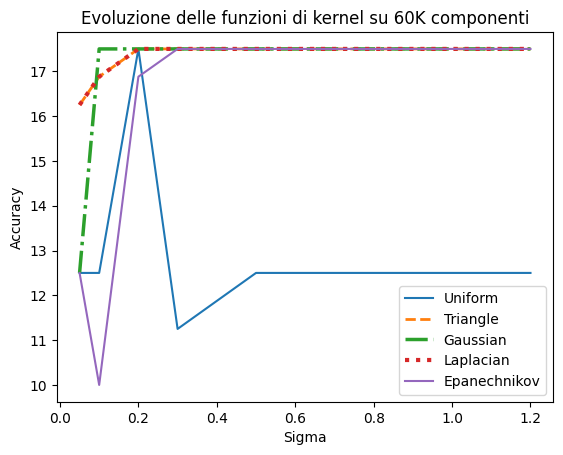

In [ ]:
df =  pd.read_csv("/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_PNN_RESULT_CODIFICA_SPARSA/results_testset_babele_CSV_60K.csv")

# Definiamo la funzione per rimuovere il simbolo percentuale dalle stringhe
def remove_percent(string):
    if isinstance(string, str):
        return float(string.strip('%'))
    return string


# Rimuoviamo il simbolo percentuale dalla colonna "Accuracy" di ogni DataFrame
df['Accuracy'] = df['Accuracy'].apply(lambda x: remove_percent(x))

# Estrai i valori unici di Kernel
kernels = df['Kernel'].unique()

# Crea un grafico a linee per ogni Kernel con linee tratteggiate o di diverso spessore
linestyles = ['solid', 'dashed', 'dashdot', 'dotted']  # Esempio di stili di linea
linewidths = [1.5, 2.0, 2.5, 3.0]  # Esempio di spessori di linea
for i, kernel in enumerate(kernels):
    kernel_df = df[df['Kernel'] == kernel]
    plt.plot(kernel_df['Smoothing Param'], kernel_df['Accuracy'], label=kernel, linestyle=linestyles[i % len(linestyles)], linewidth=linewidths[i % len(linewidths)])

plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.title('Evoluzione delle funzioni di kernel su 60K componenti')
plt.legend()
plt.show()

### Generazione grafici PCA

----------------------------------------------------------------------------------------------------
---> Accuratezza massima nel file:  results_testset_babele_CSV_8.csv
---> Accuratezza presente su N° 8  componenti
---> Accuratezza raggiunta:  20.62
---> Kernel utilizzato:  Uniform
---> Sigma:  0.2
----------------------------------------------------------------------------------------------------


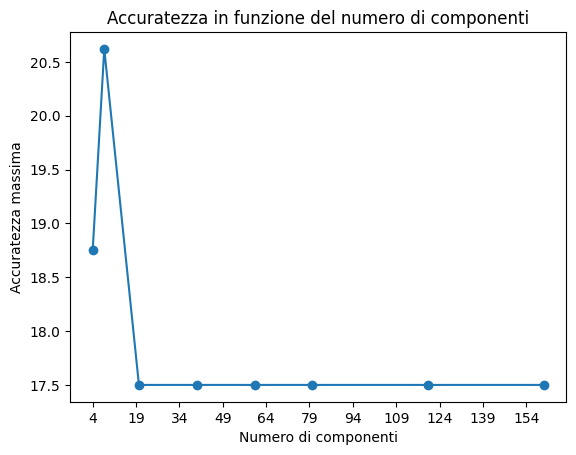

In [ ]:

filenames = ["/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_PNN_RESULT_CODIFICA_SPARSA/results_testset_babele_CSV_4.csv",
             "/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_PNN_RESULT_CODIFICA_SPARSA/results_testset_babele_CSV_8.csv",
             "/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_PNN_RESULT_CODIFICA_SPARSA/results_testset_babele_CSV_20.csv",
             "/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_PNN_RESULT_CODIFICA_SPARSA/results_testset_babele_CSV_40.csv",
             "/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_PNN_RESULT_CODIFICA_SPARSA/results_testset_babele_CSV_60.csv",
             "/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_PNN_RESULT_CODIFICA_SPARSA/results_testset_babele_CSV_80.csv",
             "/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_PNN_RESULT_CODIFICA_SPARSA/results_testset_babele_CSV_120.csv",
             "/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_PNN_RESULT_CODIFICA_SPARSA/results_testset_babele_CSV_160.csv"]

componenti = [4, 8, 20, 40 , 60, 80, 120, 160]

# Inizializzazione del dizionario per salvare l'accuratezza massima per ogni numero di frame
accuracy_dict = {}
max_acc_glob = -1.0
max_filename = None
max_num_frame_glob = 0
max_kernel_glob = None
max_sigma_glob = None

i= 0
# Ciclo for per leggere i file di salvataggio e salvare l'accuratezza massima per ogni numero di frame
for filename in filenames:
    # Lettura del file di salvataggio
    df = pd.read_csv(filename)
    # Calcolo dell'accuratezza massima
    max_acc = df['Accuracy'].str.rstrip('%').astype(float).max()
    if max_acc > max_acc_glob:
      max_acc_glob = max_acc
      max_filename = filename.split("/")[-1]
      max_num_frame_glob = int(componenti[i])
      max_kernel_glob = df.loc[df['Accuracy'].str.rstrip('%').astype(float) == max_acc_glob, 'Kernel'].iloc[0]
      max_sigma_glob = df.loc[df['Accuracy'].str.rstrip('%').astype(float) == max_acc_glob, 'Smoothing Param'].iloc[0]
      # Salvataggio dell'accuratezza massima nel dizionario
    frame_number = int(componenti[i])
    accuracy_dict[frame_number] = max_acc
    i = i +1


print(100*"-")
print("---> Accuratezza massima nel file: ", max_filename)
print("---> Accuratezza presente su N°", max_num_frame_glob, " componenti")
print("---> Accuratezza raggiunta: ", max_acc_glob )
print("---> Kernel utilizzato: ", max_kernel_glob )
print("---> Sigma: ", max_sigma_glob)
print(100*"-")

# Creazione del grafico lineare
x_ticks = range(min(accuracy_dict.keys()), max(accuracy_dict.keys())+1, 15)
plt.xticks(x_ticks)
plt.plot(list(accuracy_dict.keys()), list(accuracy_dict.values()), marker='o')
plt.xlabel('Numero di componenti')
plt.ylabel('Accuratezza massima')
plt.title('Accuratezza in funzione del numero di componenti')
plt.show()




## Grafico unione Feature Sparse coding + feature landmark

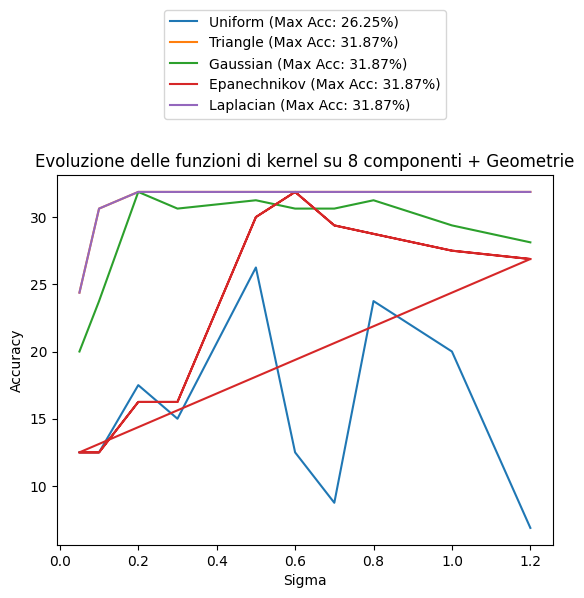

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leggi il dataframe dal file
df = pd.read_csv("/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_PNN_RESULT_MERGED/results_testset_babele_CSV_60FPS+8PCA.csv")

# Definiamo la funzione per rimuovere il simbolo percentuale dalle stringhe
def remove_percent(string):
    if isinstance(string, str):
        return float(string.strip('%'))
    return string

# Rimuoviamo il simbolo percentuale dalla colonna "Accuracy" di ogni DataFrame
df['Accuracy'] = df['Accuracy'].apply(lambda x: remove_percent(x))

# Estrai i valori unici di Kernel
kernels = df['Kernel'].unique()

max_accuracy_dict = {}  # Dizionario per memorizzare le accuracy massime per ogni kernel

for i, kernel in enumerate(kernels):
    kernel_df = df[df['Kernel'] == kernel]
    plt.plot(kernel_df['Smoothing Param'], kernel_df['Accuracy'], label=kernel)

    # Trova l'accuracy massima per il kernel corrente
    max_accuracy = kernel_df['Accuracy'].max()
    max_accuracy_dict[kernel] = max_accuracy  # Memorizza l'accuracy massima nel dizionario

plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.title('Evoluzione delle funzioni di kernel su 8 componenti + Geometrie')
plt.legend()

# Aggiungi la legenda con le accuracy massime
legend_text = [f'{kernel} (Max Acc: {max_accuracy:.2f}%)' for kernel, max_accuracy in max_accuracy_dict.items()]
plt.legend(legend_text, loc='upper right')  # Imposta la posizione della legenda

# Imposta la coordinata della legenda personalizzata
legend_x = 0.5
legend_y = 1.3
plt.legend(legend_text, loc='center', bbox_to_anchor=(legend_x, legend_y))


plt.show()

## Confrontro tra le tre strategie

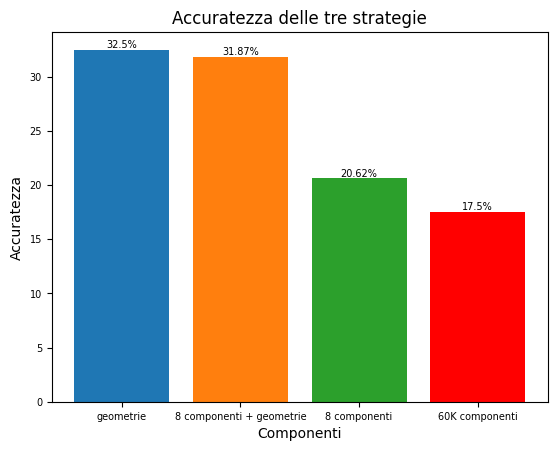

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Leggi i dataframe dai file
df_60 = pd.read_csv("/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_PNN_RESULT_CODIFICA_SPARSA/results_testset_babele_CSV_60K.csv")
df_8 = pd.read_csv("/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_PNN_RESULT_CODIFICA_SPARSA/results_testset_babele_CSV_8.csv")
df_merge = pd.read_csv("/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_PNN_RESULT_MERGED/results_testset_babele_CSV_60FPS+8PCA.csv")
df_geometrie = pd.read_csv("/content/drive/Shareddrives/Progetti FVAB 22 23 - VSR & BABELE/Gruppi/Gruppo 22/Progetto BABELE/CSV_PNN_RESULT/cityblock6_frame_random.csv")

# Definiamo la funzione per rimuovere il simbolo percentuale dalle stringhe
def remove_percent(string):
    if isinstance(string, str):
        return float(string.strip('%'))
    return string

# Rimuoviamo il simbolo percentuale dalla colonna "Accuracy" di ogni DataFrame
df_60['Accuracy'] = df_60['Accuracy'].apply(lambda x: remove_percent(x))
df_8['Accuracy'] = df_8['Accuracy'].apply(lambda x: remove_percent(x))
df_merge['Accuracy'] = df_merge['Accuracy'].apply(lambda x: remove_percent(x))
df_geometrie['Accuracy'] = df_geometrie['Accuracy'].apply(lambda x: remove_percent(x))

# Calcola le accuratezze massime per ogni dataset
max_accuracy_60 = df_60['Accuracy'].max()
max_accuracy_8 = df_8['Accuracy'].max()
max_accuracy_merge = df_merge['Accuracy'].max()
max_accuracy_geometrie = df_geometrie['Accuracy'].max()*100

# Crea un grafico a barre con le accuratezze massime e colori diversi per i dataset
labels = ['60K componenti', '8 componenti', '8 componenti + geometrie', 'geometrie']
accuracies = [max_accuracy_60, max_accuracy_8, max_accuracy_merge,max_accuracy_geometrie]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c','#ff0000']

# Ordina le lingue in base all'accuratezza in ordine decrescente
sorted_data = sorted(zip(labels, accuracies), key=lambda x: x[1], reverse=True)
labels, accuracies = zip(*sorted_data)

plt.bar(labels, accuracies, color=colors)

# Aggiungi il valore dell'accuratezza sopra ogni barra
for i, v in enumerate(accuracies):
    plt.text(i, v, str(v) + "%", ha='center', va='bottom', fontsize=7)

# Aggiungi titolo, etichette degli assi e griglia
plt.title('Accuratezza delle tre strategie')
plt.xlabel('Componenti')
plt.ylabel('Accuratezza')
plt.grid(False)

# Diminuisci la dimensione delle label sull'asse x
plt.xticks(fontsize=7)

# Diminuisci la dimensione delle label sull'asse y
plt.yticks(fontsize=7)

# Mostra il grafico
plt.show()

#### **Grafici accuratezza e F1-score su validation set**
L'accuratezza è sicuramente una prima metrica da prendere in considerazione.
Un'accuratezza troppo bassa, per il caso d'uso in esame, rende il modello poco o per nulla adatto.
Un'accuratezza pari a 0.98 vuol dire che, su 100 campioni, il nostro modello fornisce previsioni
sbagliate soltanto su 2 campioni, è una misura dell'accuratezza di un test. La misura tiene in considerazione precisione e recupero del test, dove la precisione è il numero di veri positivi diviso il numero di tutti i risultati positivi, mentre il recupero è il numero di veri positivi diviso il numero di tutti i test che sarebbero dovuti risultare positivi (ovvero veri positivi più falsi negativi)


In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(121)
sns.lineplot(y=results['Accuracy'],x=results['Smoothing Param'],hue=results['Kernel'], marker='o');
plt.title('Accuracy for Different Kernels on Valid. set',loc='right');

plt.subplot(122)
sns.lineplot(y=results['F1-Score'],x=results['Smoothing Param'],hue=results['Kernel'], marker='s');
plt.title('F1-Score for Different Kernels on Valid. set',loc='left');

plt.show()